In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('train_E6oV3lV.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

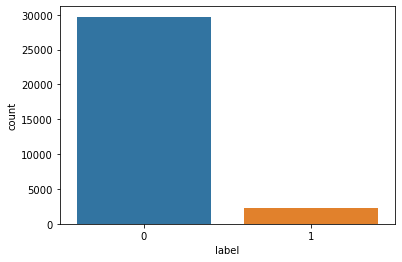

In [6]:
import seaborn as sns
sns.countplot(train['label'])

In [7]:
# before preparation
print(train['tweet'].loc[9:10])

9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
Name: tweet, dtype: object


## Data Preparations
> - Clean the data

In [8]:
# remove special keyword
import string
def specialKey(text):
    keys = ['@','#']
    for separator in  string.punctuation:
        if separator not in keys:
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in keys:
                words.append(word)
    return ' '.join(words)
train['tweet'] = train['tweet'].apply(lambda x: specialKey(x))

In [9]:
train['tweet'].head(10)

0    when a father is dysfunctional and is so selfi...
1    thanks for credit i can t use cause they don t...
2                                  bihday your majesty
3    i love u take with u all the time in urð± ð...
4                               factsguide society now
5    2 2 huge fan fare and big talking before they ...
6                            camping tomorrow dannyâ¦
7    the next school year is the year for exams ð...
8                             we won love the land â¦
9                             welcome here i m it s so
Name: tweet, dtype: object

In [10]:
# after preparations
print(train['tweet'].loc[9:10])

9                              welcome here i m it s so
10    â consumer price index mom climbed from prev...
Name: tweet, dtype: object


In [11]:
# remove commas, spaces, question marks etc.
def removePunctuation(text):
    trans = str.maketrans('', '', string.punctuation)
    return text.translate(trans)
train['tweet']= train['tweet'].apply(lambda x: removePunctuation(x))

In [12]:
# after cleaning data
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for credit i can t use cause they don t...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in urð± ð...
4,5,0,factsguide society now


In [14]:
# remove all unwanted symbols present in data sets which ain't characters
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

train['tweet'] = train['tweet'].apply(lambda x: deEmojify(x))

In [15]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for credit i can t use cause they don t...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in ur
4,5,0,factsguide society now


In [16]:
train.shape

(31962, 3)

- remove stopwords and stem

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import re
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [19]:
def transform_text(text, stem=True):
    
    text = text.lower()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
train['tweet'] = train['tweet'].apply(transform_text)

In [20]:
# remove nums and links
train['tweet'] = train['tweet'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')
train['tweet'] = train['tweet'].str.replace('\d+', '')
train['tweet'] = train['tweet'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '')

In [21]:
train.head(10)

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct
1,2,0,thank credit use caus offer wheelchair van pdx
2,3,0,bihday majesti
3,4,0,love u take u time ur
4,5,0,factsguid societi
5,6,0,huge fan fare big talk leav chao pay disput get
6,7,0,camp tomorrow danni
7,8,0,next school year year exam think
8,9,0,love land
9,10,0,welcom


## Model Building on train data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
#cv = CountVectorizer()
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(train['tweet']).toarray()
x.shape

(31962, 16201)

In [24]:
# y = train.iloc[:,[1]].values
# y[:10]
y = train['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [25]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22373, 16201)
(9589, 16201)
(22373,)
(9589,)


In [27]:
# to classifie model will use Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

model1 = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
model2 = LinearSVC(loss='hinge', random_state=0)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

LinearSVC(loss='hinge', random_state=0)

In [28]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

In [29]:
y_pred1.shape, y_pred2.shape

((9589,), (9589,))

In [30]:
# acuracy score
from sklearn.metrics import accuracy_score

print('SGDclassfier accuracy is: ',accuracy_score(y_test, y_pred1))
print('LinearSVC accuracy is: ',accuracy_score(y_test, y_pred2))

SGDclassfier accuracy is:  0.9455626238398165
LinearSVC accuracy is:  0.9495254979664198


In [31]:
# report
from sklearn.metrics import classification_report
print('classification report from Stochastic gradient decenst:\n')
print(classification_report(y_test, y_pred1))
print()
print('classfication report of Linear vector machine:\n')
print(classification_report(y_test, y_pred2))

classification report from Stochastic gradient decenst:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8921
           1       0.90      0.25      0.39       668

    accuracy                           0.95      9589
   macro avg       0.92      0.62      0.68      9589
weighted avg       0.94      0.95      0.93      9589


classfication report of Linear vector machine:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8921
           1       0.86      0.33      0.48       668

    accuracy                           0.95      9589
   macro avg       0.91      0.66      0.72      9589
weighted avg       0.95      0.95      0.94      9589



In [34]:
from sklearn.metrics import confusion_matrix
print('confsuion matrix by SGD\n',confusion_matrix(y_pred1, y_test))
print()
print('consfusion matrix by LinearSVC\n',confusion_matrix(y_pred2, y_test))

confsuion matrix by SGD
 [[8903  504]
 [  18  164]]

consfusion matrix by LinearSVC
 [[8885  448]
 [  36  220]]


In [35]:
'''label 0: predict tweet is fine
label 1: predict tweets are sexist/recist'''
temp_df = pd.DataFrame({'actual':y_test, 'predicted by SGD':y_pred1, 'predicted by SVC':y_pred2})
temp_df.tail()

,actual,predicted by SGD,predicted by SVC
21312,0,0,0
11967,0,0,0
8147,0,0,0
23968,0,1,1
29784,0,0,0


## Make prediction on Unseen/test data

In [36]:
test = pd.read_csv('test_tweets_anuFYb8.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [37]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [38]:
test['tweet'] = test['tweet'].apply(lambda x: specialKey(x))

test['tweet']= test['tweet'].apply(lambda x: removePunctuation(x))

test['tweet'] = test['tweet'].apply(transform_text)

test['tweet'] = test['tweet'].apply(lambda x: deEmojify(x))

# remove nums and links
test['tweet'] = test['tweet'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')
test['tweet'] = test['tweet'].str.replace('\d+', '')
test['tweet'] = test['tweet'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '')

In [40]:
test.head(10)

,id,tweet
0,31963,find
1,31964,want everyon see new here
2,31965,safe way heal
3,31966,hp curs child book reserv alreadi yes
4,31967,rd amaz hilari eli ahmir uncl dave love misses
5,31968,choos
6,31969,someth insid die eye ness
7,31970,
8,31971,never understand dad left young
9,31972,mannaepicur


In [41]:
train_len = len(train) # it will help to identifie the data
test_len = len(test)
print(train_len, test_len)

31962 17197


In [42]:
df = pd.concat([train, test], axis=0)  # axis:0 represents a column
df.iloc[31960:31966]

,id,label,tweet
31960,31961,1.0,vandalis condemn act
31961,31962,0.0,thank follow
0,31963,NaN,find
1,31964,NaN,want everyon see new here
2,31965,NaN,safe way heal
3,31966,NaN,hp curs child book reserv alreadi yes


In [43]:
# for solving above error we need to reset the index
df.reset_index(drop=True, inplace=True)

In [44]:
df.iloc[31960:31966]   # we can see we finally remove data redundancy

,id,label,tweet
31960,31961,1.0,vandalis condemn act
31961,31962,0.0,thank follow
31962,31963,NaN,find
31963,31964,NaN,want everyon see new here
31964,31965,NaN,safe way heal
31965,31966,NaN,hp curs child book reserv alreadi yes


In [45]:
print(len(train), len(test), len(df))

31962 17197 49159


## spliting unseen data into train and test

In [49]:
train_Unseen = df.iloc[:train_len,:]
test_Unseen = df.iloc[train_len:,:]

In [50]:
train_Unseen.head()

,id,label,tweet
0,1,0.0,father dysfunct selfish drag kid dysfunct
1,2,0.0,thank credit use caus offer wheelchair van pdx
2,3,0.0,bihday majesti
3,4,0.0,love u take u time ur
4,5,0.0,factsguid societi


In [53]:
# we can see from the above label columns have changed from int to float
# let's change into int again
train_Unseen['label'] = train_Unseen['label'].astype(int)
train_Unseen.label.dtype
train_Unseen.head()

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct
1,2,0,thank credit use caus offer wheelchair van pdx
2,3,0,bihday majesti
3,4,0,love u take u time ur
4,5,0,factsguid societi


In [54]:
test_Unseen.head()

,id,label,tweet
31962,31963,NaN,find
31963,31964,NaN,want everyon see new here
31964,31965,NaN,safe way heal
31965,31966,NaN,hp curs child book reserv alreadi yes
31966,31967,NaN,rd amaz hilari eli ahmir uncl dave love misses


In [55]:
test_Unseen = test_Unseen.drop(columns=['label'])
test_Unseen.head()

,id,tweet
31962,31963,find
31963,31964,want everyon see new here
31964,31965,safe way heal
31965,31966,hp curs child book reserv alreadi yes
31966,31967,rd amaz hilari eli ahmir uncl dave love misses


In [57]:
x1 = tfidf.fit_transform(train_Unseen['tweet']).toarray()

In [58]:
y1 = train_Unseen['label']

In [59]:
final_model = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

In [60]:
final_model.fit(x1,y1)

SGDClassifier(random_state=0)

In [61]:
feature_to_be_predict = tfidf.transform(test_Unseen['tweet']).toarray()

In [63]:
pred = final_model.predict(feature_to_be_predict)

In [64]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
submission = pd.DataFrame()
submission['id'] = test_Unseen['id']
submission['predict'] = pred
submission['tweet'] = test_Unseen.tweet
submission.head()

,id,predict,tweet
31962,31963,0,find
31963,31964,0,want everyon see new here
31964,31965,0,safe way heal
31965,31966,0,hp curs child book reserv alreadi yes
31966,31967,0,rd amaz hilari eli ahmir uncl dave love misses


# Rough work:
> - tried various methodlogy to predicting on unseen data label which didn't work, need to reviews

In [68]:
# let's save the clasifier into local system
import pickle
# dump model and tfidf
pickle.dump(model1, open('model1.pkl', 'wb'))
pickle.dump(model2, open('model2.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [75]:
# load the classifier
org_tfidf = pickle.load(open('tfidf.pkl', 'rb'))
pre_trained_model_1 = pickle.load(open('model1.pkl', 'rb'))
pre_trained_model_2 =pickle.load(open('model2.pkl', 'rb'))

In [81]:
test_df = org_tfidf.transform(test['tweet']).toarray()

In [82]:
test_df.shape

(17197, 11877)

In [90]:
test_df[:,10]

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
# y_pred_test = pre_trained_model_2.predict(test_df)

In [ ]:
"""
len(train) -- 8523
len(test)  -- 5681

concate(train,test) ---- 14204
data preparations

# spilitng data
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]


"""

In [138]:
#print(accuracy_score(m_test, pred))

In [161]:
test['predicted'] = pred
test.to_csv('test_result.csv', index=False)

In [141]:
# finalize my my result
submission.to_csv('submission.csv', index=False)

In [136]:
m_test.loc[49155]

id                   49156
tweet    feel like mermaid
Name: 49155, dtype: object

In [70]:
test1 = pd.read_csv('test_tweets_anuFYb8.csv')
test1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [76]:
test1.iloc[0,1]

'#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ\x80¦ '

In [95]:
a.split('#')

['',
 'studiolife ',
 'aislife ',
 'requires ',
 'passion ',
 'dedication ',
 'willpower   to find ',
 'newmaterialsâ\x80¦ ']

In [78]:
import string
def specialKey(text):
    keys = ['@','#']
    for separator in  string.punctuation:
        if separator not in keys:
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in keys:
                words.append(word)
    return ' '.join(words)

a = test1.iloc[0,1]
print(specialKey(a))

to find


In [112]:
lis = a.split('#')
string = ' '.join(lis)
string

'#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ\x80¦ '

In [114]:
test1.tweet

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [115]:
def remsep(text):
    text = text.split('#')
    return ' '.join(text)

In [116]:
test1['tweet'] = test1['tweet'].apply(lambda x: remsep(x))
test1.tweet

0         studiolife  aislife  requires  passion  dedic...
1         @user  white  supremacists want everyone to s...
2        safe ways to heal your  acne!!     altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd  bihday to my amazing, hilarious  nephew...
                               ...                        
17192    thought factory: left-right polarisation!  tru...
17193    feeling like a mermaid ð  hairflip  neverre...
17194     hillary  campaigned today in  ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!   shoegaze ...
Name: tweet, Length: 17197, dtype: object

Basically we are doing the above operation for passing more text to my model, because in the above trained model we directly remove the hashtag with words instead of removing the words... i am not sure but it could be produce somewhat a accurate result